# Prepare Data

- Import wine data set
  + class 0: red wine
  + class 1: white wine

In [5]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")
print(wine.head())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


In [6]:
# checking missing value and types of variable
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
print(wine.describe()) # vary in scale of variables, in need of standardization

           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000


- Split data into training sets and test sets

In [10]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


- Standardize Data
- Decision tree does not require standardized preprocessing,<br/> but it is recommended to perform standardization basically.

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [25]:
print(lr.predict_proba(train_scaled[:5]))
print(lr.predict(train_scaled[:5]))

[[0.06189333 0.93810667]
 [0.21742616 0.78257384]
 [0.40703571 0.59296429]
 [0.45226659 0.54773341]
 [0.00530794 0.99469206]]
[1. 1. 1. 1. 1.]


In [26]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# Decision Tree Model
#### : a non-parametric supervised learning method used for classification and regression
- to predict the value of a target variable by learning simple decision rules inferred from the data features
- Simple to understand and to interpret
- More likely to be overfitting the training set.
- New Algorithm Using Decision Tree Algorithms
  + XGBoost, LightGBM, CatBoost, etc
  + In particular, LightGBM is now widely used in practice.

### DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # appear to be overfitting

0.996921300750433
0.8592307692307692


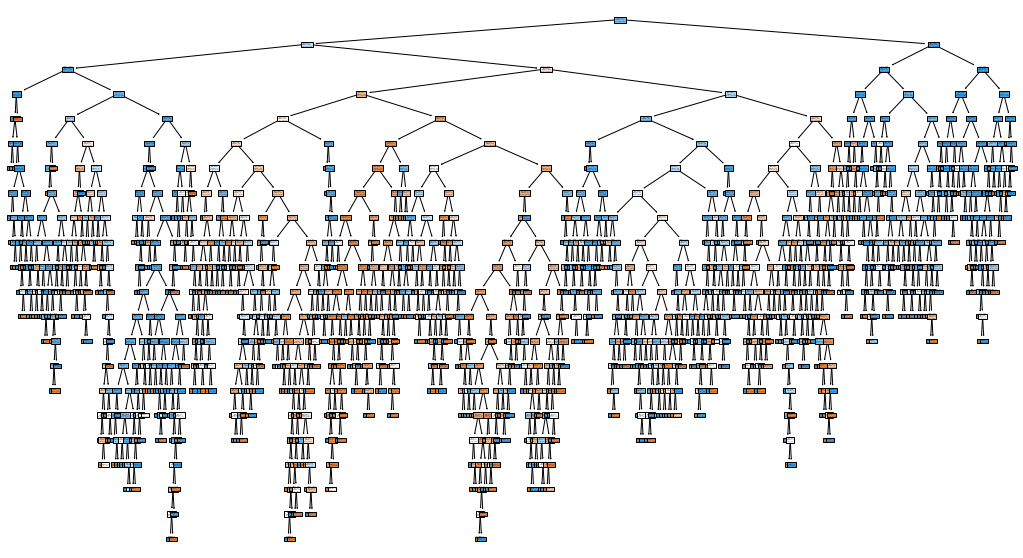

In [75]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(18,10))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()
# - conditions for testing : sugar
# - impurity : gini
# - samples : total number of samples
# - value : number of samples by class

## Impurity(불순도)
- parameter criterion; default 'gini'
- gini = 1 - (negative_prop^2 + positive_prop^2)
  + best : 0 (pure node)
  + worst : 0.5 (exactly half and half)
- entropy = - negative_prop * log_2(negative_prop) - positive_prop * log_2(positive_prop)
- Information gain(정보 이득) : impurity differences between parent node and child node
  + Decision tree splits nodes to maximize information gain using impurity criteria.

## Pruning(가지치기)
- In order to prevent overfitting the training set
- By specifying the maximum depth of a tree that can grow

In [52]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # successful in reducing overfitting

0.8454877814123533
0.8415384615384616


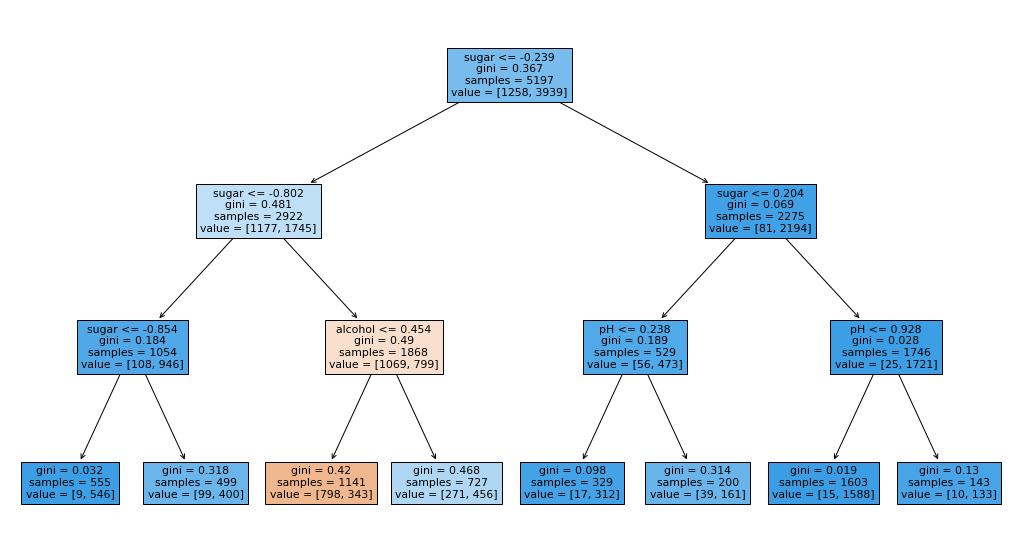

In [55]:
fig, ax = plt.subplots(figsize=(18,10))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- parameter min_impurity_decrease; default 0.0
  + Split nodes if this split induces a decrease of the impurity greater than or equal to this value.
  - More likely to be asymmetric tree

0.8874350586877044
0.8615384615384616


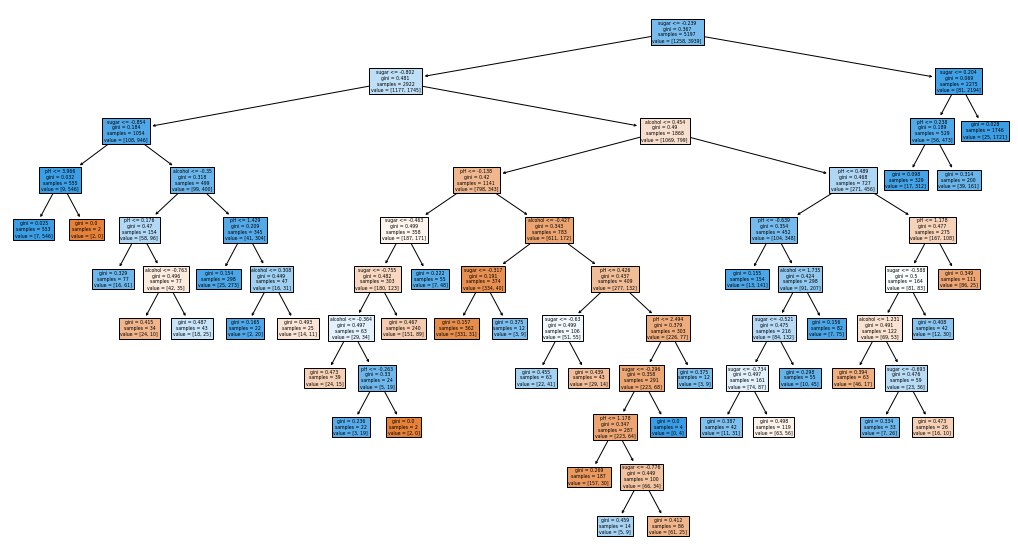

In [71]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

## Feature importance
: an indicator of the degree to which each feature contributed to reducing impurities
- Multiply the information gain and the ratio of the total sample by each node, and add it up by feature.

In [61]:
print(dt.feature_importances_) # Sugar is the most important feature.

[0.12345626 0.86862934 0.0079144 ]
